# MARIA MAGDALENE NAMAGANDA
# 2019/HD07/24853U
# Ace_class Kaggle assignment_1

## Importing some of the needed packages and libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import pyplot
import seaborn as sns

from sklearn.model_selection import KFold
from pandas import read_csv
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier




# Description of Libraries used.
* Pandas is a library in Python for data manipulation and analysis. It offers data structures and operations for manipulating numerical tables and time series.
* Matplotlib is a plotting library for the Python.
* Seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics.
* K-Fold cross validation is where a given data set is split into a K number of sections/folds where each fold is used as a testing set at some point.
* A confusion matrix is a table that is often used to describe the performance of a classification model on a set of test data for which the true values are known.
* In Train/Test Split the data we use is usually split into training data and test data. The training set contains a known output and the model learns on this data in order to be generalized to other data later on
* Logistic Regression is used for classification problems, it is a predictive analysis algorithm and based on the concept of probability.
* A decision tree is a flowchart-like tree structure where an internal node represents feature(attribute), the branch represents a decision rule, and each leaf node represents the outcome.
* KNeighbours Classifier is a non-parametric algorithm whose purpose is to use a database in which the data points are separated into several classes to predict the classification of a new sample point.
* The Naive Bayes is a classification algorithm that is suitable for binary and multiclass classification. It performs well in cases of categorical input variables compared to numerical variables. 
* The linear Discriminant analysis estimates the probability that a new set of inputs belongs to every class.
* SVC (Support Vector Classifier) is to fit the data you provide, returning a "best fit" hyperplane that divides, or categorizes your data.
* The basic concept behind Adaboost is to set the weights of classifiers and training the data sample in each iteration such that it ensures the accurate predictions of unusual observations.
* AdaBoost works by weighting the observations, putting more weight on difficult to classify instances and less on those already handled well.
* ExtraTreesClassifier, like RandomForest, randomizes certain decisions and subsets of data to minimize over-learning from the data and overfitting.

> *Now i need to get rid of some unnecessary warnings by ignoring them*

In [2]:
#To avoid unnecessary warnings, I will ignore them in the code below
import warnings
warnings.filterwarnings('ignore')

## Loading the datasets 
### There are two datasets given; 
1. AMP_TrainSet.csv and 
2. Test.csv  

In [3]:
#Loading the datasets, 

Train = pd.read_csv("../Data/AMP_TrainSet.csv")
Test = pd.read_csv("../Data/Test.csv")


### For training the model, I will first use the training set which I will further split into the train and validation set. 

<div class = 'alert alert-info'>
   @atwine: Did not explain why they are splitting, I need to see why they are doing this.
   </div>
### Then I will test the model on the Test set provided to gauge its performance.

# Exploring my data
## Exploring data helps one understand what kind of data is given. That is to say knowing how much data it is, the shape, type, dimensions, missing values, data summary, correlation of attributes among others as am going to do in the following steps.

In [4]:
#here, am trying to find the type of data
type(Train)
type(Test)
Train.dtypes, Test.dtypes

(FULL_Charge           float64
 FULL_AcidicMolPerc    float64
 FULL_AURR980107       float64
 FULL_DAYM780201       float64
 FULL_GEOR030101       float64
 FULL_OOBM850104       float64
 NT_EFC195               int64
 AS_MeanAmphiMoment    float64
 AS_DAYM780201         float64
 AS_FUKS010112         float64
 CT_RACS820104         float64
 CLASS                   int64
 dtype: object, FULL_Charge           float64
 FULL_AcidicMolPerc    float64
 FULL_AURR980107       float64
 FULL_DAYM780201       float64
 FULL_GEOR030101       float64
 FULL_OOBM850104       float64
 NT_EFC195               int64
 AS_MeanAmphiMoment    float64
 AS_DAYM780201         float64
 AS_FUKS010112         float64
 CT_RACS820104         float64
 dtype: object)

In [5]:
# checking the dimensions of the data
# this retuns the number of rows and columns in the data

Train.shape, Test.shape

#this helps to know how big the data is in terms of rows and columns.
#also from here I can tell which data is labeled

((3038, 12), (758, 11))

## Data description
>For now, I will focus more on the train dataset because its what I will use to train the model 

In [6]:
#getting a description of the train dataset
#description gives a summary of the data.

Train.describe()

,FULL_Charge,FULL_AcidicMolPerc,FULL_AURR980107,FULL_DAYM780201,FULL_GEOR030101,FULL_OOBM850104,NT_EFC195,AS_MeanAmphiMoment,AS_DAYM780201,AS_FUKS010112,CT_RACS820104,CLASS
count,3038.000000,3038.000000,3038.000000,3038.000000,3038.000000,3038.000000,3038.000000,3038.000000,3038.000000,3038.000000,3038.000000,3038.000000
mean,2.060237,8.521520,0.971410,73.668760,0.994007,-2.432927,0.088545,15.683233,73.650828,5.911361,1.235255,0.500000
std,3.819929,7.586652,0.107413,8.527489,0.031333,1.707223,0.284133,11.575665,9.166092,0.693689,0.210012,0.500082
min,-16.000000,0.000000,0.684000,42.750000,0.866000,-10.432000,0.000000,0.041000,42.778000,3.533000,0.785000,0.000000
25%,0.000000,2.516000,0.895000,68.294000,0.974000,-3.606000,0.000000,5.587500,67.556000,5.459250,1.082000,0.000000
50%,2.000000,7.143000,0.963000,74.059500,0.994000,-2.296500,0.000000,14.988500,73.697000,5.925500,1.184000,0.500000
75%,4.000000,13.158000,1.041000,79.343750,1.011000,-1.283250,0.000000,26.807750,79.778000,6.382000,1.351000,1.000000
max,30.000000,46.667000,1.451000,101.682000,1.196000,3.576000,1.000000,51.280000,103.167000,8.662000,2.192000,1.000000


In [7]:
#looking at the first 5 entries of my data
Train.head()

,FULL_Charge,FULL_AcidicMolPerc,FULL_AURR980107,FULL_DAYM780201,FULL_GEOR030101,FULL_OOBM850104,NT_EFC195,AS_MeanAmphiMoment,AS_DAYM780201,AS_FUKS010112,CT_RACS820104,CLASS
0,5.0,0.000,0.951,74.842,0.975,-3.663,0,0.282,73.444,5.661,1.041,1
1,4.0,5.405,0.931,71.595,0.957,-4.011,1,0.600,68.222,6.537,1.453,1
2,5.5,5.405,0.873,73.595,0.961,-2.512,0,0.593,69.444,4.934,1.722,1
3,5.0,4.167,0.895,66.250,0.999,-1.362,0,0.614,67.222,4.316,1.382,1
4,7.5,8.537,0.932,64.720,0.979,-2.091,0,0.616,72.944,4.540,1.539,1


## Class Distribution
> From the Train dataset, i see there is an extra 'CLASS' column which will be my validation set.
### I need to know how this class is distributed to guide me on what to do with it.

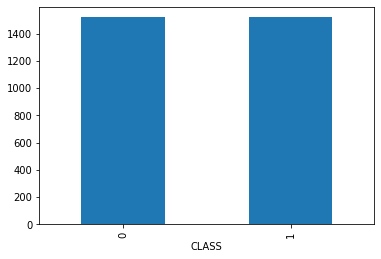

In [8]:
#to see the class distribution, I will plot a bar graph
Train.groupby('CLASS').size().plot(kind='bar')
pyplot.show()

> I would like to know how many instaces i have for each class

In [9]:
#getting the number of instances in each class
Train.groupby('CLASS').size()

CLASS
0    1519
1    1519
dtype: int64

### There are 1519 intances for each class which is proof for even distribution.
### From the above barplot and class instances, I can see that the classes are evenly distributed so no need to use smote.

# Data Visualisation
### Data visualization is the technique to present the data in a pictorial or graphical format. It enables one to analyze data visually. The data in a graphical format allows identification of new trends and patterns easily.
### Visualisation identifies the relationship between data points and variables.

## Density plots

> I chose to use density plots because they are better at determing the distribution shape as they are not affected by the number of bins as is the case with Histograms.

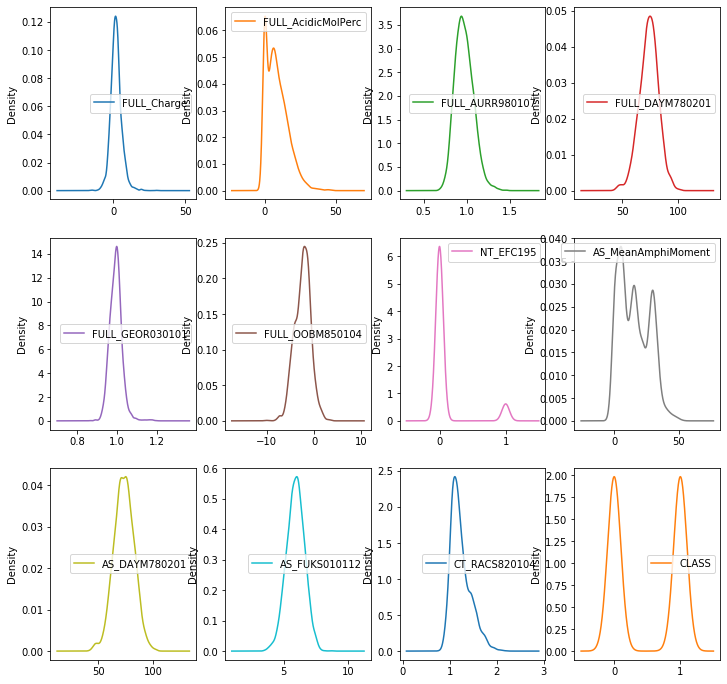

In [10]:
#now plotting density subplots
#setting the figsize to 12 so that my graphs are not congested
Train.plot(kind='density', subplots = True, layout=(3,4), sharex= False, sharey= False, figsize=(12,12))
plt.show()


> From the above density subpots, I can see that most of the data follows a Gaussian distribution given some of the characteristics such as bell shaped curves and graphs being symmetrical about the mean.

## Box and whisker plots
> A box plot is a type of graph that displays a summary of a large amount of data in terms of the median, upper quartile, lower quartile, minimum and maximum data values.

> It handles large data easily, gives a clear summary and displays outliers.

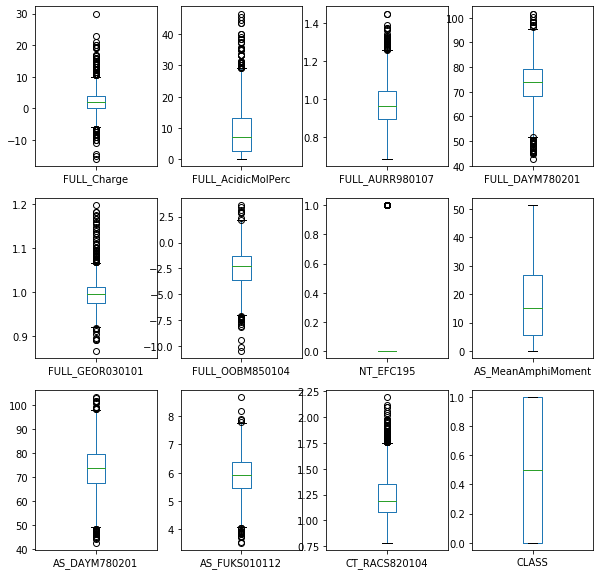

In [11]:
#plotting a box and whisker graph
#setting the figsize to 10 so that the plots are not congested.
Train.plot(kind='box', subplots = True, layout=(3,4), sharex= False, sharey= False, figsize=(10,10))
plt.show()

## Looking at the correlation of the data

> Correlation is the relationship between two variables. The commonly used method is Pearson's correlation coefficient. It assumes a normal distribution of the attributes involved.

> -1 shows full negative correlation, 

> +1 shows full negative correlation and 

> 0 shows no correlation at all.

In [12]:
#first I will checkfor the pairwise correlation of the attributes.
Train.corr(method='pearson')

,FULL_Charge,FULL_AcidicMolPerc,FULL_AURR980107,FULL_DAYM780201,FULL_GEOR030101,FULL_OOBM850104,NT_EFC195,AS_MeanAmphiMoment,AS_DAYM780201,AS_FUKS010112,CT_RACS820104,CLASS
FULL_Charge,1.000000,-0.612996,-0.490977,-0.434603,-0.058725,-0.283758,0.088068,0.355477,-0.365374,-0.090570,0.232929,0.534602
FULL_AcidicMolPerc,-0.612996,1.000000,0.794796,0.541481,0.115201,0.513344,-0.143168,-0.431590,0.449621,0.002334,-0.213543,-0.598816
FULL_AURR980107,-0.490977,0.794796,1.000000,0.548253,0.346139,0.462712,-0.169540,-0.426097,0.456260,0.032958,-0.403599,-0.584111
FULL_DAYM780201,-0.434603,0.541481,0.548253,1.000000,0.010118,0.334778,-0.090058,-0.408793,0.894191,0.055915,-0.326792,-0.554838
FULL_GEOR030101,-0.058725,0.115201,0.346139,0.010118,1.000000,0.319157,-0.230417,-0.160269,-0.029085,0.040480,-0.151935,-0.260470
FULL_OOBM850104,-0.283758,0.513344,0.462712,0.334778,0.319157,1.000000,-0.230561,-0.336297,0.275640,-0.452769,0.155304,-0.453287
NT_EFC195,0.088068,-0.143168,-0.169540,-0.090058,-0.230417,-0.230561,1.000000,0.178683,-0.036844,0.145924,0.080898,0.260702
AS_MeanAmphiMoment,0.355477,-0.431590,-0.426097,-0.408793,-0.160269,-0.336297,0.178683,1.000000,-0.322378,0.025580,0.171524,0.693552
AS_DAYM780201,-0.365374,0.449621,0.456260,0.894191,-0.029085,0.275640,-0.036844,-0.322378,1.000000,0.045562,-0.256060,-0.437168
AS_FUKS010112,-0.090570,0.002334,0.032958,0.055915,0.040480,-0.452769,0.145924,0.025580,0.045562,1.000000,-0.445284,0.033432


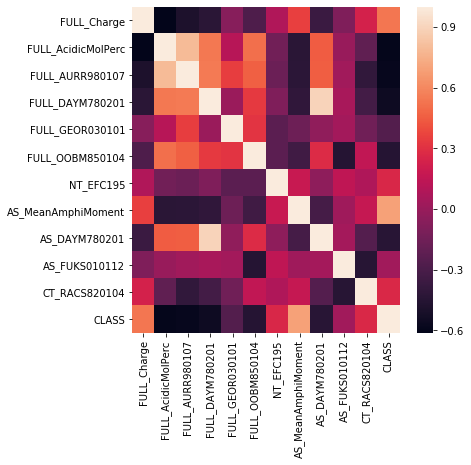

In [13]:
#Then now am reviewing the inter-correlation of attributes using heatmap
#graphical representation
plt.figure(figsize=(6,6))
sns.heatmap(Train.corr(method='pearson'))

In [14]:
#Ill also check the correlation in regards to the 'CLASS' attribute
Train.corr(method='pearson')['CLASS']

FULL_Charge           0.534602
FULL_AcidicMolPerc   -0.598816
FULL_AURR980107      -0.584111
FULL_DAYM780201      -0.554838
FULL_GEOR030101      -0.260470
FULL_OOBM850104      -0.453287
NT_EFC195             0.260702
AS_MeanAmphiMoment    0.693552
AS_DAYM780201        -0.437168
AS_FUKS010112         0.033432
CT_RACS820104         0.267652
CLASS                 1.000000
Name: CLASS, dtype: float64

## Skewnwess of the data
> knowing data skewness allows one to perform data preparation and improve a model

> If Skewness value lies above +1 or below -1 then the data is highly skewed. 

> If skewness value lies between +0.5 and -0.5 then the data ids moderately skewed.

> If skewness is 0 then data is symmetrical

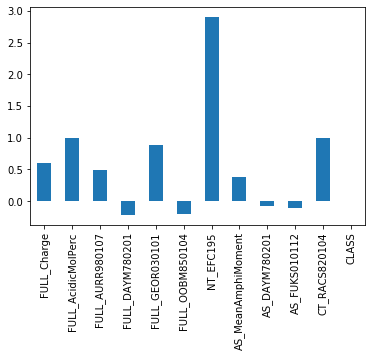

In [15]:
#Checking out skewness of data
Train.skew().plot(kind='bar')

# Comparing Machine Learning Algorithms
>  This helps to choose the best model for the problem at hand.

>  Using resampling methods like cross validation, gives an estimate for how accurate each model may be on unseen data.

>  It is important to ensure that each algorithm is evaluated in the same way on the same data to avoid bias.

('LR', 0.9063005464480876, 0.13577589382538835)
('LDA', 0.9081202185792349, 0.16200541794052895)
('KNN', 0.8893770491803281, 0.15039644863318388)
('CART', 0.8810109289617487, 0.12535175208835309)
('NB', 0.9150163934426229, 0.06671294103051226)
('SVM', 0.8977868852459018, 0.16388180621798357)
('AB', 0.9005573770491805, 0.14889029794369535)
('GBC', 0.9146939890710383, 0.1271369611553431)
('EXT', 0.9265300546448089, 0.09354977798111189)
('RTC', 0.9218852459016393, 0.10656696397955046)


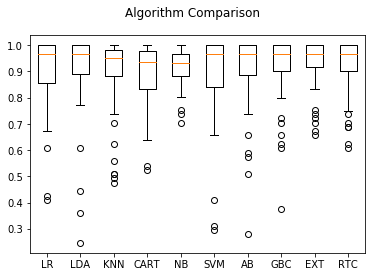

In [16]:
#comparing different models to from which ill choose.


# load dataset

array = Train.values

#split the dataset 
X = array[:,0:11]  #X = Train.drop(columns=['CLASS'])
Y = array[:,11]   #Y = Train['CLASS']

# preparing models and adding them to a list
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))
models.append(('AB', AdaBoostClassifier()))
models.append(('GBC', GradientBoostingClassifier()))
models.append(('EXT', ExtraTreesClassifier()))
models.append(('RTC', RandomForestClassifier()))
#models.append(('XGB', XGBClassifier)) 
#am commenting out XGB it does not seem to be a scikit-learn estimator as it does not implement a 'get_params' methods.

# evaluating each model in turn
results = []
names = []

for name, model in models:
    kfold = KFold(n_splits=50, random_state=42)
    cv_results = cross_val_score(model, X, Y, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    msg = (name, cv_results.mean(), cv_results.std())
    print(msg)

# boxplot algorithm comparison
fig = pyplot.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()

> ## From the above algorithm comparison, I can see that Naive Bayes(NB), ExtraTreesClassifiers(EXT) and RandomForestClassifiers(RTC) are some of the best performing algorithms. 
> ## Am yet to find out the overall best valgorithm after prediction on the Test set

# Feature selection 
## Using recursive feature elimination
> Sometimes, you may asses a dataset and find out that you do not need to use all the given features. This can be because some of them are highly correlates or they are not in any way helpful in developing the model.
* It is therefore important to get rid of some features where applicable.

> For this data, I will use Recursive Feature Elimination(RFE)

In [17]:
#feature selection using RFE
#first i will start with choosing 4 features
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

array = Train.values
X = array[:,0:11]
Y = array[:,11]
# feature extraction
model = LogisticRegression()
rfe = RFE(model, 4)
fit = rfe.fit(X, Y)
print("Num Features: ", fit.n_features_)
print("Selected Features:", fit.support_)
print("Feature Ranking: ", fit.ranking_)

Num Features:  4
Selected Features: [False False  True False False  True  True False False False  True]
Feature Ranking:  [3 7 1 6 2 1 1 4 8 5 1]


In [18]:
#Calling out the column names so I can know which features am going to drop from RFE
Train.columns

Index(['FULL_Charge', 'FULL_AcidicMolPerc', 'FULL_AURR980107',
       'FULL_DAYM780201', 'FULL_GEOR030101', 'FULL_OOBM850104', 'NT_EFC195',
       'AS_MeanAmphiMoment', 'AS_DAYM780201', 'AS_FUKS010112', 'CT_RACS820104',
       'CLASS'],
      dtype='object')

## Using Feature importance

In [19]:
from sklearn.ensemble import ExtraTreesClassifier

array = Train.values
X = array[:,0:11]
Y = array[:,11]
# feature extraction
model = ExtraTreesClassifier()
model.fit(X, Y)
print(model.feature_importances_)

[0.08227437 0.14418508 0.08895859 0.08005117 0.05746269 0.07433544
 0.03416612 0.30382632 0.05147578 0.03226204 0.0510024 ]


## If am to use 4 features and drop the rest
> I will assign the new dataset a variable 'New_Train4' after choosing the 4 features and dropping the rest.

In [20]:
# I will call the new Train data with selected features New_Train4.
Train
New_Train4 = Train.drop(['FULL_Charge', 'FULL_AcidicMolPerc', 'FULL_DAYM780201', 'FULL_GEOR030101', 'AS_MeanAmphiMoment', 'AS_DAYM780201', 'AS_FUKS010112'], axis =1)

In [21]:
#dropping the same features in the test dataset
New_Test4 = Test.drop(['FULL_Charge', 'FULL_AcidicMolPerc', 'FULL_DAYM780201', 'FULL_GEOR030101', 'AS_MeanAmphiMoment', 'AS_DAYM780201', 'AS_FUKS010112'], axis =1)

In [22]:
#viewing the selected features
New_Train4.columns

Index(['FULL_AURR980107', 'FULL_OOBM850104', 'NT_EFC195', 'CT_RACS820104',
       'CLASS'],
      dtype='object')

In [23]:
#now splitting data
#array = New_Train.values
X = New_Train4.values[:,0:4]
Y = New_Train4.values[:,4]
from sklearn.model_selection import train_test_split
X_Train, X_Test, Y_Train, Y_Test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [24]:
# also train and test the model on Matthews correlation coefficient.
from sklearn.metrics import matthews_corrcoef

GS = GaussianNB()
GS.fit(X_Train,Y_Train)
pred = GS.predict(X_Test)

print("The result is: ",np.round(matthews_corrcoef(Y_Test,pred) *100,2)," Mathew's Coef")

The result is:  62.28  Mathew's Coef


## Using four features gives me a very low MCC and low overall score.
## I'll therefore consider using 8 features and see what score  I get.

In [ ]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

array = Train.values
X = array[:,0:11]
Y = array[:,11]
# feature extraction
model = LogisticRegression()
rfe = RFE(model, 8)
fit = rfe.fit(X, Y)
print("Num Features: ", fit.n_features_)
print("Selected Features:", fit.support_)
print("Feature Ranking: ", fit.ranking_)

In [ ]:
# I will call the new Train data with selected features New_Train8.
Train
New_Train8 = Train.drop(['FULL_AcidicMolPerc', 'FULL_DAYM780201', 'AS_DAYM780201'], axis =1)

In [ ]:
#dropping the same features in the test dataset
New_Test8 = Test.drop(['FULL_AcidicMolPerc', 'FULL_DAYM780201', 'AS_DAYM780201'], axis =1)

In [ ]:
#now splitting data
#array = New_Train.values


X = New_Train8.values[:,0:8]
Y = New_Train8.values[:,8]
from sklearn.model_selection import train_test_split
X_Train, X_Test, Y_Train, Y_Test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [ ]:
#now creating a model and training it on 8 features
model = LogisticRegression(solver='liblinear', C=0.05, multi_class='ovr', random_state=30)
model.fit(X_Train, Y_Train)

In [ ]:
from sklearn.model_selection import train_test_split
X_Train, X_Test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2,
random_state=42)

In [ ]:
from sklearn.metrics import matthews_corrcoef

nv = GaussianNB()
nv.fit(X_Train,Y_Train)
pred = nv.predict(X_Test)

print("The result is: ",np.round(matthews_corrcoef(Y_Test,pred) *100,2)," Mathew's Coef")

## Standardising data
> This is useful to transform attributes with a Gaussian distribution and it workd better with rescaled data(also known as normalistaion where attributes are scaled into a range between 0 and 1)

# Below are some of the algorithms I will be using;

# LINEAR ALGORITHMS
1. Linear Regression
2. Logistic Regression
3. Linear Discriminant Analysis

# Logistic Regression using 8 features

In [ ]:
# here am using a dataset 'New_Train8' with 8 selected features
array = New_Train8.values
X = array[:,0:8]
Y = array[:,8]

kfold = KFold(n_splits=10, random_state=42) #spliiting my data into 10 folds and random_state of 42 for reproducibility
model = LogisticRegression() #calling out the prediction algorithm
results = cross_val_score(model, X, Y, cv=kfold) #estimating the model on new data and assigning it to results variable
print(results.mean())  #getting the mean of the accuracy scores from cross validation scores

model.fit(X,Y)
output = model.predict(New_Test8.values) #testing the model on the test_set (Test.values)

from sklearn.metrics import matthews_corrcoef
mcc = matthews_corrcoef(model.predict(X),Y)
print('MCC:',mcc)
                       
maria_logistic = pd.DataFrame(output)  #here we are converting the array into a pandas dataframe which will give a single column
maria_logistic.columns = ['CLASS'] #renaming the output column to 'CLASS'
maria_logistic.index.name = "Index"  #naming the index column as 'Index'
maria_logistic['CLASS']=maria_logistic['CLASS'].map({0.0:False, 1.0:True}) #converting '0.0' to' False' and '1.0' to 'True'
maria_logistic.to_csv("maria_logistic.csv") #changing my output file as a 'csv' file

print(maria_logistic['CLASS'].unique()) #checking out the unique instances in the 'CLASS' column
print('False: ',maria_logistic.groupby('CLASS').size()[0].sum()) #summing up the '0' instances in the 'CLASS' column
print('True: ',maria_logistic.groupby('CLASS').size()[1].sum()) #summing up the '1' instances in the 'CLASS' column

# NOTE
> I have noticed that for this particular dataset, the more I drop features, the prediction scores also keep decreasing.

> With 4 features selected, the score was low, with 8 features, the score improved and with all features, the prediction score was high.

> I therefore decided to work with all the features.

# Applying Linear Dicriminant Analysis (LDA) using all features 

In [ ]:
array = Train.values
X = array[:,0:11]
Y = array[:,11]
num_folds = 10
kfold = KFold(n_splits=10, random_state=42) #spliiting my data into 10 folds and random_state of 42 for reproducibility
model = LinearDiscriminantAnalysis() #calling out the prediction algorithm
results = cross_val_score(model, X, Y, cv=kfold) #estimating the model on new data and assigning it to results variable
print(results.mean())  #getting the mean of the accuracy scores from cross validation scores

model.fit(X,Y)
output = model.predict(Test.values) #testing the model on the test_set (Test.values)

from sklearn.metrics import matthews_corrcoef
mcc = matthews_corrcoef(model.predict(X),Y)
print('MCC:',mcc)
                       
maria_LDA = pd.DataFrame(output)  #here we are converting the array into a pandas dataframe which will give a single column
maria_LDA.columns = ['CLASS'] #renaming the output column to 'CLASS'
maria_LDA.index.name = "Index"  #naming the index column as 'Index'
maria_LDA['CLASS']=maria_LDA['CLASS'].map({0.0:False, 1.0:True}) #converting '0.0' to' False' and '1.0' to 'True'
maria_LDA.to_csv("maria_LDA.csv") #changing my output file as a 'csv' file

print(maria_LDA['CLASS'].unique())  #checking out the unique instances in the 'CLASS' column
print('False: ',maria_LDA.groupby('CLASS').size()[0].sum()) #summing up the '0' instances in the 'CLASS' column
print('True: ',maria_LDA.groupby('CLASS').size()[1].sum()) #summing up the '1' instances in the 'CLASS' column

# NON LINEAR ALGORITHMS
1. Naive Bayes
2. Support Vector Machines
3. K-Nearest Neighbours
4. Classification and Regression Trees
5. Learning Vector Quantization

# Using Naive Bayes and all the features

In [ ]:
array = Train.values
X = array[:,0:11]
Y = array[:,11]
test_size = 0.35 

kfold = KFold(n_splits=10) #spliiting my data into 10 folds 

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=test_size, random_state=42) #random_state of 42 for reproducibility

model = GaussianNB() #calling out the prediction algorithm
results = cross_val_score(model, X, Y, cv=kfold) #estimating the model on new data and assigning it to results variable
print(results.mean())  #getting the mean of the accuracy scores from cross validation scores


model.fit(X,Y)
output = model.predict(Test.values) #testing the model on the test_set (Test.values)

from sklearn.metrics import matthews_corrcoef
mcc = matthews_corrcoef(model.predict(X),Y)
print('MCC:',mcc)
                       
maria2_bayes = pd.DataFrame(output)  #here we are converting the array into a pandas dataframe which will give a single column
maria2_bayes.columns = ['CLASS'] #renaming the output column to 'CLASS'
maria2_bayes.index.name = "Index"  #naming the index column as 'Index'
maria2_bayes['CLASS']=maria2_bayes['CLASS'].map({0.0:False, 1.0:True}) #converting '0.0' to' False' and '1.0' to 'True'
maria2_bayes.to_csv("maria2_bayes.csv") #changing my output file as a 'csv' file


print(maria2_bayes['CLASS'].unique()) #checking out the unique instances in the 'CLASS' column
print('False: ',maria2_bayes.groupby('CLASS').size()[0].sum()) #summing up the '0' instances in the 'CLASS' column
print('True: ',maria2_bayes.groupby('CLASS').size()[1].sum()) #summing up the '1' instances in the 'CLASS' column

# Support Vector Machines algorithm using all features

In [ ]:
array = Train.values
X = array[:,0:11]
Y = array[:,11]
kfold = KFold(n_splits=10) #spliiting my data into 10 folds

model = SVC() #calling out the prediction algorithm
scoring = 'acuracy'
results = cross_val_score(model, X, Y, cv=kfold) #estimating the model on new data and assigning it to results variable
print(results.mean())  #getting the mean of the accuracy scores from cross validation scores

model.fit(X, Y)
output = model.predict(Test.values) #testing the model on the test_set (Test.values)

mcc = matthews_corrcoef(model.predict(X), Y)
print('MCC: ',mcc)

maria_svc = pd.DataFrame(output)  #here we are converting the array into a pandas dataframe which will give a single column
maria_svc.columns = ['CLASS'] #renaming the output column to 'CLASS'
maria_svc.index.name = 'Index'  #naming the index column as 'Index'
maria_svc['CLASS'] = maria_svc['CLASS'].map({0.0:False, 1.0:True}) #converting '0.0' to' False' and '1.0' to 'True'

maria_svc.to_csv('maria_svc.csv') #changing my output file as a 'csv' file

print(maria_svc['CLASS'].unique()) #checking out the unique instances in the 'CLASS' column
print('False: ',maria_svc.groupby('CLASS').size()[0].sum()) #summing up the '0' instances in the 'CLASS' column
print('True: ',maria_svc.groupby('CLASS').size()[1].sum()) #summing up the '1' instances in the 'CLASS' column

# Applying Classification and Regression Trees

In [ ]:
from sklearn.tree import DecisionTreeClassifier
array = Train.values
X = array[:,0:11]
Y = array[:,11]
kfold = KFold(n_splits=10, random_state=42) #spliiting my data into 10 folds and random_state of 42 for reproducibility
model = DecisionTreeClassifier() #calling out the prediction algorithm
results = cross_val_score(model, X, Y, cv=kfold) #estimating the model on new data and assigning it to results variable
print(results.mean())  #getting the mean of the accuracy scores from cross validation scores


model.fit(X,Y)
output = model.predict(Test.values) #testing the model on the test_set (Test.values)

from sklearn.metrics import matthews_corrcoef
mcc = matthews_corrcoef(model.predict(X),Y)
print('MCC:',mcc)
                       
maria_tree = pd.DataFrame(output)  #here we are converting the array into a pandas dataframe which will give a single column
maria_tree.columns = ['CLASS'] #renaming the output column to 'CLASS'
maria_tree.index.name = "Index"  #naming the index column as 'Index'
maria_tree['CLASS']=maria_tree['CLASS'].map({0.0:False, 1.0:True}) #converting '0.0' to' False' and '1.0' to 'True'
maria_tree.to_csv("maria_tree.csv") #changing my output file as a 'csv' file


print(maria_tree['CLASS'].unique()) #checking out the unique instances in the 'CLASS' column
print('False: ',maria_tree.groupby('CLASS').size()[0].sum()) #summing up the '0' instances in the 'CLASS' column
print('True: ',maria_tree.groupby('CLASS').size()[1].sum()) #summing up the '1' instances in the 'CLASS' column

# K-Nearest Neighbours

In [ ]:
array = Train.values
X = array[:,0:11]
Y = array[:,11]

kfold = KFold(n_splits=10, random_state=42) #spliiting my data into 10 folds and random_state of 42 for reproducibility
model = KNeighborsClassifier() #calling out the prediction algorithm
results = cross_val_score(model, X, Y, cv=kfold) #estimating the model on new data and assigning it to results variable
print(results.mean()) #getting the mean of the accuracy scores from cross validation scores

model.fit(X,Y) 
output = model.predict(Test.values) #testing the model on the test_set (Test.values)

from sklearn.metrics import matthews_corrcoef
mcc = matthews_corrcoef(model.predict(X),Y)
print('MCC:',mcc)
                       
maria_knn = pd.DataFrame(output) #here we are converting the array into a pandas dataframe which will give a single column
maria_knn.columns = ['CLASS'] #renaming the output column to 'CLASS' 
maria_knn.index.name = "Index" #naming the index column as 'Index'
maria_knn['CLASS']=maria_knn['CLASS'].map({0.0:False, 1.0:True}) #converting '0.0' to' False' and '1.0' to 'True'
maria_knn.to_csv("maria_knn.csv") #changing my output file as a 'csv' file


print(maria_knn['CLASS'].unique()) #checking out the unique instances in the 'CLASS' column
print('False: ',maria_knn.groupby('CLASS').size()[0].sum()) #summing up the '0' instances in the 'CLASS' column
print('True: ',maria_knn.groupby('CLASS').size()[1].sum()) #summing up the '1' instances in the 'CLASS' column

# Esemble Algorithms
1. Boosting and Adaboost
2. Bagging and Random forest

# Applying Adaboost 

In [ ]:
array = Train.values

X = array[:,0:11]
Y = array[:,11]

kfold = KFold(n_splits=10, random_state=42)

model = AdaBoostClassifier(n_estimators=200, random_state=42) 
results = cross_val_score(model, X, Y, cv=kfold)

print(results.mean())


test_set = Test.values
model.fit(X, Y)
output = model.predict(test_set)

mcc = matthews_corrcoef(model.predict(X), Y)
print('MCC: ',mcc)

maria_AB= pd.DataFrame(output)
maria_AB.columns = ['CLASS']
maria_AB.index.name = 'Index'
maria_AB['CLASS'] = maria_AB['CLASS'].map({0.0:False, 1.0:True})

maria_AB.to_csv('maria_AB.csv')

print(maria_AB['CLASS'].unique())
print('False: ',maria_AB.groupby('CLASS').size()[0].sum())
print('True: ',maria_AB.groupby('CLASS').size()[1].sum())

# Applying Gradient Boosting Classifier

In [ ]:
array = Train.values

X = array[:,0:11]
Y = array[:,11]

#num_trees = 200
#seed =42

kfold = KFold(n_splits=10, random_state=42)
model = GradientBoostingClassifier(n_estimators=200, random_state=42)
results = cross_val_score(model, X, Y, cv=kfold)
print(results.mean())

model.fit(X,Y) 
output = model.predict(Test.values) #testing the model on the test_set (Test.values)

from sklearn.metrics import matthews_corrcoef
mcc = matthews_corrcoef(model.predict(X),Y)
print('MCC:',mcc)
                       
maria_GBC = pd.DataFrame(output) #here we are converting the array into a pandas dataframe which will give a single column
maria_GBC.columns = ['CLASS'] #renaming the output column to 'CLASS' 
maria_GBC.index.name = "Index" #naming the index column as 'Index'
maria_GBC['CLASS']=maria_GBC['CLASS'].map({0.0:False, 1.0:True}) #converting '0.0' to' False' and '1.0' to 'True'
maria_GBC.to_csv("maria_GBC.csv") #changing my output file as a 'csv' file


print(maria_GBC['CLASS'].unique()) #checking out the unique instances in the 
print('False: ',maria_GBC.groupby('CLASS').size()[0].sum()) #summing up the '0' instances in the 'CLASS' column
print('True: ',maria_GBC.groupby('CLASS').size()[1].sum()) #summing up the '1' instances in the 'CLASS' column

# Using Stochastic Gradient Boosting Classification

In [ ]:
array = Train.values
X = array[:,0:11]
Y = array[:,11]

kfold = KFold(n_splits=10, random_state=42)
model = XGBClassifier(n_estimators=200, random_state=42)
results = cross_val_score(model, X, Y, cv=kfold)
print(results.mean())

model.fit(X,Y) 
output = model.predict(Test.values) #testing the model on the test_set (Test.values)

from sklearn.metrics import matthews_corrcoef
mcc = matthews_corrcoef(model.predict(X),Y)
print('MCC:',mcc)
                       
maria_XGB = pd.DataFrame(output) #here we are converting the array into a pandas dataframe which will give a single column
maria_XGB.columns = ['CLASS'] #renaming the output column to 'CLASS' 
maria_XGB.index.name = "Index" #naming the index column as 'Index'
maria_XGB['CLASS']=maria_XGB['CLASS'].map({0.0:False, 1.0:True}) #converting '0.0' to' False' and '1.0' to 'True'
maria_XGB.to_csv("maria_XGB.csv") #changing my output file as a 'csv' file


print(maria_GBC['CLASS'].unique()) #checking out the unique instances in the 
print('False: ',maria_XGB.groupby('CLASS').size()[0].sum()) #summing up the '0' instances in the 'CLASS' column
print('True: ',maria_XGB.groupby('CLASS').size()[1].sum()) #summing up the '1' instances in the 'CLASS' column

# Using Extra Trees Classifier

In [ ]:
array = Train.values

X = array[:,0:11]
Y = array[:,11]

kfold = KFold(n_splits=10, random_state=42)
model = ExtraTreesClassifier(n_estimators=200) # (max_features=11)
results = cross_val_score(model, X, Y, cv=kfold)
print(results.mean())
                             
model.fit(X,Y) 
output = model.predict(Test.values) #testing the model on the test_set (Test.values)

from sklearn.metrics import matthews_corrcoef
mcc = matthews_corrcoef(model.predict(X),Y)
print('MCC:',mcc)
                       
maria_ETX = pd.DataFrame(output) #here we are converting the array into a pandas dataframe which will give a single column
maria_ETX.columns = ['CLASS'] #renaming the output column to 'CLASS' 
maria_ETX.index.name = "Index" #naming the index column as 'Index'
maria_ETX['CLASS']=maria_ETX['CLASS'].map({0.0:False, 1.0:True}) #converting '0.0' to' False' and '1.0' to 'True'
maria_ETX.to_csv("maria_ETX.csv") #changing my output file as a 'csv' file


print(maria_ETX['CLASS'].unique()) #checking out the unique instances in the 
print('False: ',maria_ETX.groupby('CLASS').size()[0].sum()) #summing up the '0' instances in the 'CLASS' column
print('True: ',maria_ETX.groupby('CLASS').size()[1].sum()) #summing up the '1' instances in the 'CLASS' column                           

# CONCLUSION
## From the algorithm comparisons and my prediction scores, Naive Bayes algorithm performed the best.
## I think this is because the data was following a Gaussian distribution(normally distributed) as seen earlier from the density subplots.

# REFERENCES
1. https://realpython.com/logistic-regression-python/
2. https://www.tutorialspoint.com/machine_learning_with_python/machine_learning_with_python_extra_trees.htm
3. https://stackabuse.com/gradient-boosting-classifiers-in-python-with-scikit-learn/
4. https://machinelearningmastery.com/stochastic-gradient-boosting-xgboost-scikit-learn-python/
5. https://machinelearningmastery.com/stochastic-gradient-boosting-xgboost-scikit-learn-python/
6. https://machinelearningmastery.com/compare-machine-learning-algorithms-python-scikit-learn/
7. https://machinelearningmastery.com/master-machine-learning-algorithms/
8. https://machinelearningmastery.com/compare-machine-learning-algorithms-python-scikit-learn/
9. https://github.com/search?q=data-analysis-and-visualization-with-python&type=Repositories
10. https://stackabuse.com/applying-filter-methods-in-python-for-feature-selection/
11. https://towardsdatascience.com/decision-tree-in-machine-learning-e380942a4c96
12. https://machinelearningmastery.com/compare-machine-learning-algorithms-python-scikit-learn/